# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

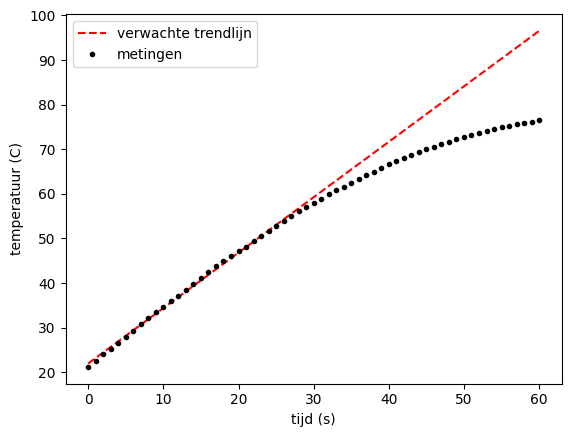

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fileName = 'tempmetingen.csv'

data = np.loadtxt(fileName, delimiter=';', skiprows=1)
data = data.T

t = data[0]
temp = data[1]

def y(x, a, b):
    return a*x+b

val, cov = curve_fit(y, t[:30], temp[:30])

t_test = np.linspace(0, 60, 1000)
temp_test = y(t_test, val[0], val[1])


plt.figure()
plt.plot(t_test, temp_test, 'r--', label='verwachte trendlijn')
plt.plot(t, temp, 'k.', label='metingen')
plt.xlabel('tijd (s)')
plt.ylabel('temperatuur (C)')
plt.legend()
plt.show()


In [7]:
# Antwoorden:

# Toelichting vraag 1:
# De metingen wijken af van de verwachte trendlijn in het geval
# dat alle toegevoerde energie in het water gaat zitten, 
# dit komt doordat het water verdampt bij een hoge temperatuur,
# en er warmte verloren gaat, waardoor de temperatuur van 
# het water minder snel zal stijgen. 

# Vraag 2:


# Vraag 3:
# Door beter isolerend materiaal te gebruiken voor de beker
# waar het water in zit en de opstelling zo dicht mogelijk te
# maken (wel natuurlijk dat er nog steeds iets doorheen 
# kan wat de temperatuur meet, dit zou zo klein mogelijk
# gemaakt kunnen worden door bijvoorbeeld een thermische 
# draad te gebruiken). Ook door ervoor zorgen dat de temperatuur
# het gehele water beter beschrijft en niet alleen een punt, 
# aangezien dit kleine veranderingen kan hebben op verschillende
# punten. Dit kan door of minder water te gebruiken, of door
# de thermometer goed in het midden te positioneren, of door
# meerdere punten te meten en het gemiddelde ervan te nemen.